## Goodness of Fit

### The $\chi^2$ Distribution

Suppose that we have a set of $n$ independent samples, $x_i$, from a set of $n$  independent Gaussian distributions with mean $\mu_i$ and standard deviation $\sigma_i$.  Let's define 
$$
\epsilon_i = x_i - \mu_i
$$
which implies
$$
\epsilon_i \sim \mathcal{N}(\epsilon_i| 0, \sigma_i^2). 
$$
Now consider the sum of the squares of these deviations
$$
\chi^2 = \sum_{i=1}^n \frac{\epsilon_i^2}{\sigma_i^2}.  
$$
So now $\chi^2$ is a new random variable that is the sum of the squares of $n$ independent Gaussian random variables.  It can be shown 
mathematically that this new variable follows the **$\boldsymbol{\chi^2}$-distribution** with $\mathbf{n}$ **degrees of freedom**. 
The probability density function of the $\chi^2$ distribution is given by
$$
P(\chi^2|n) = \frac{(\chi^2)^{(n-2)/2}}{2^{n/2}(n/2-1)!}\exp\left[-\frac{1}{2}\chi^2\right]. 
$$
where $N! \equiv N(N-1)(N-2)\cdots 1$ is defined to be the factorial of $N$.

We can use the properties of the mean, $\langle \rangle$,  and definition of the variance operator, $\rm {Var}$, that we studied before to compute the mean value of the $\chi^2$ distribution. We have
$$
\langle \chi^2\rangle = \langle \sum_{i=1}^n \frac{\epsilon_i^2}{\sigma_i^2}\rangle = \sum_{i=1}^n \frac{\langle \epsilon_i^2\rangle}{\sigma_i^2}, 
$$
where we used the property that the mean is a linear operator: $\langle Ax + By\rangle = A\langle x\rangle + B\langle y\rangle$. Now note that
$$
{\rm Var}(\epsilon_i) = \sigma_i^2 \equiv \langle \epsilon_i^2\rangle - \langle \epsilon_i\rangle^2 = \langle \epsilon_i^2\rangle - 0 \quad \Rightarrow \quad \langle \epsilon_i^2\rangle = \sigma_i^2, 
$$
where we used the definition of the variance and the fact that $\mathcal{N}(\epsilon_i| 0, \sigma_i^2)$ has zero mean hence $\langle \epsilon_i\rangle = 0$. So we finally have
$$
\langle \chi^2\rangle = \sum_{i=1}^n \frac{\langle \epsilon_i^2\rangle}{\sigma_i^2} = \sum_{i=1}^n \frac{\sigma_i^2}{\sigma_i^2} =  \sum_{i=1}^n 1 = n, 
$$
which is to say that the mean value of the $\chi^2$ distribution is equal to the number of degrees of freedom, $n$. This relationship 
can also be derived by direct integration of the probability density function of the $\chi^2$ distribution $\int \chi^2 P(\chi^2|n)d\chi^2 = n$.

To compute the variance of the $\chi^2$ distribution, we need to perform the integral 
$$
{\rm Var}(\chi^2) =\sigma_{\chi^2}^2 \equiv  \int (\chi^2 - \langle \chi^2\rangle)^2 P(\chi^2|n)d\chi^2. 
$$
This is pretty straightforward to do analytically, but we will not do it here. The result is
$$
\sigma_{\chi^2}^2  = 2n. 
$$

The central limit theorem guarantees that in the limit of large $n$, the $\chi^2$ distribution approaches a Gaussian distribution. The mean and 
variance of the $\chi^2$ distribution that we just derived/stated then become the mean and variance of the Gaussian, so we have
$$
\lim_{n\rightarrow \infty} P(\chi^2|n) = \mathcal{N}(\chi^2|n, 2n) = \frac{1}{\sqrt{2\pi}\sqrt{2n}}\exp\left[-\frac{1}{2}\frac{(\chi^2 - n)^2}{2n}\right].
$$
The Gaussian form is already quite a good approximation for $n\gtrsim 30$.

To summarize: 
- The mean value of the $\chi^2$ distribution is equal to the number of degrees of freedom, $\langle \chi^2\rangle = n$.
- The variance of the $\chi^2$ distribution is equal to twice the number of degrees of freedom, $\sigma_{\chi^2}^2 = 2n$.
- The $\chi^2$ distribution approaches a Gaussian distribution in the limit of large $n$.

Below we plot the probability density function of the $\chi^2$ distribution for $n=2, 4$ and $9$ degrees of freedom. 

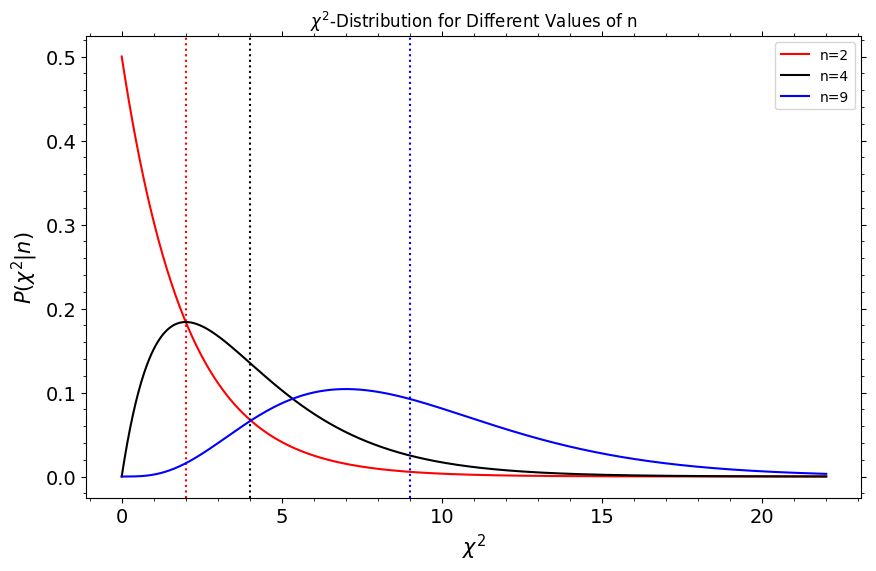

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import stats
n_values = [2, 4, 9]

# Generate x values
chi_sq = np.linspace(0, 22, 1000)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10,6))

colors = ['red', 'black', 'blue']
# Plot the chi^2 distribution for each value of n
for ii, n in enumerate(n_values):
    # Calculate the chi^2 distribution using scipy.stats
    y = stats.chi2.pdf(chi_sq, n)

    # Plot the chi^2 distribution
    ax.plot(chi_sq, y, color=colors[ii], label=f'n={n}')

    # Add vertical dotted line for the mean
    ax.axvline(n, linestyle='dotted', color=colors[ii])

# Set the plot title and labels
ax.set_title(r'$\chi^2$-Distribution for Different Values of n')
ax.set_xlabel(r'$\chi^2$', fontsize=15)
ax.set_ylabel(r'$P(\chi^2|n)$', fontsize=15)
ax.legend()

# Some tick mark things
ax.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=False, labelsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Show the plot
plt.show()



## Goodness of Fit

We discussed that if we fit a model, $\mathbf{y}_{\rm model}(\boldsymbol{\theta})$, to a dataset, $\mathbf{y}$, with errors, $\epsilon_i$,
drawn from the normal distribution $\mathcal{N}(\epsilon_i| 0, \sigma_i^2)$, then maximum-likelihood estimation is equivalent to 
$\chi^2$ minimization, where we defined the $\chi^2$ statistic by 
$$
\chi^2(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) \equiv \sum_{i=1}^n \left[\frac{y_i-y_{{\rm model},i}(\boldsymbol{\theta})}{\sigma_i}\right]^2. 
$$
Then we emphasized that the resulting point-estimate of the parameters, $\boldsymbol{\theta}_{\rm maxL}$, does not provide a measure of the uncertainty in the parameter estimates. To quantify the parameter uncertainty, we used Bayesian inference to obtain the posterior distribution, $P(\boldsymbol{\theta}|\mathbf{y})$.   However, neither maximum likelihood estimation nor Bayesian inference provide a measure of *how well the model fits the data*.  There are thus two separate but related types of questions that we want to ask when fitting data: 
1. **What are the parameters**: What is the "best-fit" or maximum likelihood set of model parameters, $\boldsymbol{\theta}_{\rm maxL}$, and/or how well do we know the parameters given the data, $P(\boldsymbol{\theta}|\mathbf{y})$?

2. **Goodness of Fit**: How well does the model, $\boldsymbol{y}_{\rm model}(\boldsymbol{\theta})$, fit the data $\mathbf{y}$ given the errors $\boldsymbol{\sigma}$?

The crux of the issue is that your knowledge of $\boldsymbol{\theta}$ from a fitting analysis is  only as good as the model that you choose and your understanding of the errors in your data, $\boldsymbol{\sigma}$. To address this point we need a way to quantify the goodness of fit.

### The $\chi^2$ Goodness of Fit Test

For the case of Gaussian distributed errors, the $\chi^2$ statistic and the $\chi^2$ distribution, $P(\chi^2|n)$, provide a means to quantify the goodness of fit. The key point is that
$$
\epsilon_i \equiv y_i - y_{{\rm model},i}(\boldsymbol{\theta_{\rm true}}) \sim \mathcal{N}(\epsilon_i| 0, \sigma_i^2). 
$$
Thus in the limit where we know the true model, $\theta_{\rm true}$,  the $\chi^2$ statistic should be distributed according to the $\chi^2$ distribution with $n$ degrees of freedom, $P(\chi^2|n)$. 

Of course in practice when fitting data, we never precisely know $\boldsymbol{\theta_{\rm true}}$. If we did, we probably would not be collecting data in the first place!  However, we can still use the $\chi^2$ distribution to test the hypothesis that the model is a good fit to the data.  Specifically, for a chosen set of 
parameter values, let's say best-fit values, $\boldsymbol{\theta}_{\rm maxL}$, we can compute the $\chi^2$ statistic
$$
\chi^2(\boldsymbol{\theta_{\rm maxL}}|\mathbf{y}, \boldsymbol{\sigma}) = \sum_{i=1}^n \left[\frac{y_i-y_{{\rm model},i}(\boldsymbol{\theta}_{\rm maxL})}{\sigma_i}\right]^2.
$$


We then ask the question: What is the probability of observing this value,  $\chi^2(\boldsymbol{\theta_{\rm maxL}}|\mathbf{y}, \boldsymbol{\sigma})\equiv \chi^2_{\rm maxL}$, given the number of degrees of freedom, $n$?  

- If the model is a good fit to the data, then: the probability of observing a value of the $\chi^2$ statistic **larger than** $\chi^2(\boldsymbol{\theta_{\rm maxL}}|\mathbf{y}, \boldsymbol{\sigma})$ should be **high**: 
  $$
  P(\chi^2_{\rm maxL} \leq \chi^2 < \infty| n) = \int_{\chi^2_{\rm maxL}}^\infty P(\chi^2|n)d\chi^2 = 1 - {\rm CDF}(\leq \chi^2_{\rm maxL}|n) \sim 1.
  $$

- If the model is a poor fit to the data, then the probability of observing a value *larger than** $\chi^2_{\rm maxL}$  should be **low**: 
  $$
  P(\chi^2_{\rm maxL} \leq \chi^2 < \infty| n) = \int_{\chi^2_{\rm maxL}}^\infty P(\chi^2|n)d\chi^2 = 1 - {\rm CDF}(\leq \chi^2_{\rm maxL}|n) \ll 1.
  $$

- Similarly, if the error bars are underestimated, then the probability of observing a value **larger than** $\chi^2_{\rm maxL}$ should be **low**:
  $$
  P(\chi^2_{\rm maxL} \leq \chi^2 < \infty| n) = \int_{\chi^2_{\rm maxL}}^\infty P(\chi^2|n)d\chi^2 = 1 - {\rm CDF}(\leq \chi^2_{\rm maxL}|n) \ll 1.
  $$

- If the error bars overestimated, then the probability of observing a value **less than or equal to** $\chi^2_{\rm maxL}$ should be **low**: 
  $$
  P(0 \leq \chi^2 \leq \chi^2_{\rm maxL}| n) = \int_{0}^{\chi^2_{\rm maxL}} P(\chi^2|n)d\chi^2 = {\rm CDF}(\leq \chi^2_{\rm maxL}|n) \ll 1.
  $$



#### The number of degrees of freedom
How do we calculate the number of degrees of freedom? Provided that our model is **linear** in the parameters, then the number of degrees of freedom is equal to the number of data points, $N$, minus the number of parameters, $m$, that we fit for:
$$
n = N - m.
$$
The reason that we have to subtract off the number of parameters is that we are using the data to fit for the parameters, so the actual number of independent data points is going to be reduced exactly by, $m$, the number of parameters that we fit for.

For models $y_{\rm model}(\boldsymbol{\theta})$ that depend non-linearly on the parameters, $\boldsymbol{\theta}$,  the number of degrees of freedom is not as straightforward to calculate. This is intuitive, since some parameters, $\theta_i$, can clearly then be much more influential and other parameters, $\theta_k$, could be nearly irrelevant, owing to the non-linear dependencies. It is nevertheless still common practice to use the value $n = N - m$ as a rough estimate of the number of degrees of freedom for non-linear models, notwithstanding these caveats. In most cases, provided that the number of data points, $N$, is much larger than the number of parameters, $m$, then the $\chi^2$ distribution is still a good approximation for the distribution of the $\chi^2$ statistic even for non-linear models. 


#### Example: A Quadratic Fit
Consider a fit to a data drawn from the quadratic function 
$$
y_{\rm model}(x|\boldsymbol{\theta}) = \theta_0 x^2 + \theta_1 x + \theta_2, 
$$
at $N=20$ equally spaced points on the interval $x\in [-2, 1]$ with Gaussian distributed errors, $\sigma_i = 0.3$, and the true parameters $\boldsymbol{\theta_{\rm true}} = (1, 0, 5)$. 

In the example below, we use the `numpy.polynomial` package to fit for the parameters, $\boldsymbol{\theta}$, using maximum likelihood estimation and then compute the $\chi^2$ statistic for each fit. We illustrate the four cases discussed in the bulleted list above in the figure, and show probability density, $P(\chi^2|n)$, for each fit setting $n$ to be the correct number of degrees of freedom depending on the number of parameters $m$ that we fit for.

In [12]:
theta_quad = [-1.0, 0.0, 5.0]
x = np.linspace(-2, 1, 20)
x_fine = np.linspace(-2.2, 1.2, 100)
y_true = np.polyval(theta_quad, x)
y_true_fine = np.polyval(theta_quad, x_fine)
# Add some constant Gaussian noise
sig_y = np.full_like(x, 0.3)
y = y_true + sig_y * rng.standard_normal(len(x))
p2 = 2
p1 = 1


# Perform a quadratic polynomial fit to the data using np.polyfit
coeffs_p2 = np.polyfit(x, y, p2, w=1.0/sig_y)
y_p2_fit = np.polyval(coeffs_p2, x)
y_p2_fit_fine = np.polyval(coeffs_p2, x_fine)
# Perform a linear fit to the data using np.polyfit
coeffs_p1 = np.polyfit(x, y, p1, w=1.0/sig_y)
y_p1_fit = np.polyval(coeffs_p1, x)
y_p1_fit_fine = np.polyval(coeffs_p1, x_fine)
# Perform a quadratic fit to the data using error bars that are too large
sig_y_tobig = rng.uniform(3.0, 7.0, len(x))*sig_y
coeffs_p2_tobig = np.polyfit(x, y, p2, w=1.0/sig_y_tobig)
y_p2_fit_tobig = np.polyval(coeffs_p2_tobig, x)
y_p2_fit_tobig_fine = np.polyval(coeffs_p2_tobig, x_fine)

# Perform a quadratic fit to the data using error bars that are too small
sig_y_tosmal = rng.uniform(0.3, 0.6, len(x))*sig_y
coefss_p2_toosmal = np.polyfit(x, y, p2, w=1.0/sig_y_tosmal)
y_p2_fit_toosmal = np.polyval(coefss_p2_toosmal, x)
y_p2_fit_toosmal_fine = np.polyval(coefss_p2_toosmal, x_fine)

# Calculate chi-square for each fit
chi2_p2 = np.sum(((y - y_p2_fit) / sig_y) ** 2)
chi2_p1 = np.sum(((y - y_p1_fit) / sig_y) ** 2)
chi2_p2_toobig = np.sum(((y - y_p2_fit_tobig)/sig_y_tobig) ** 2)
chi2_p2_toosmal = np.sum(((y - y_p2_fit_toosmal)/sig_y_tosmal) ** 2)

# Calculate the number of degrees of freedom for each fit and the P-value
dof_p2 = len(x) - (p2 + 1)
dof_p1 = len(x) - (p1 + 1)
p_chi2_p2 = 1.0 - stats.chi2.cdf(chi2_p2, dof_p2)
p_chi2_p1 = 1.0 - stats.chi2.cdf(chi2_p1, dof_p1)
p_chi2_p2_tobig= 1.0 - stats.chi2.cdf(chi2_p2_toobig, dof_p2)
p_chi2_p2_tosmal = 1.0 - stats.chi2.cdf(chi2_p2_toosmal, dof_p2)



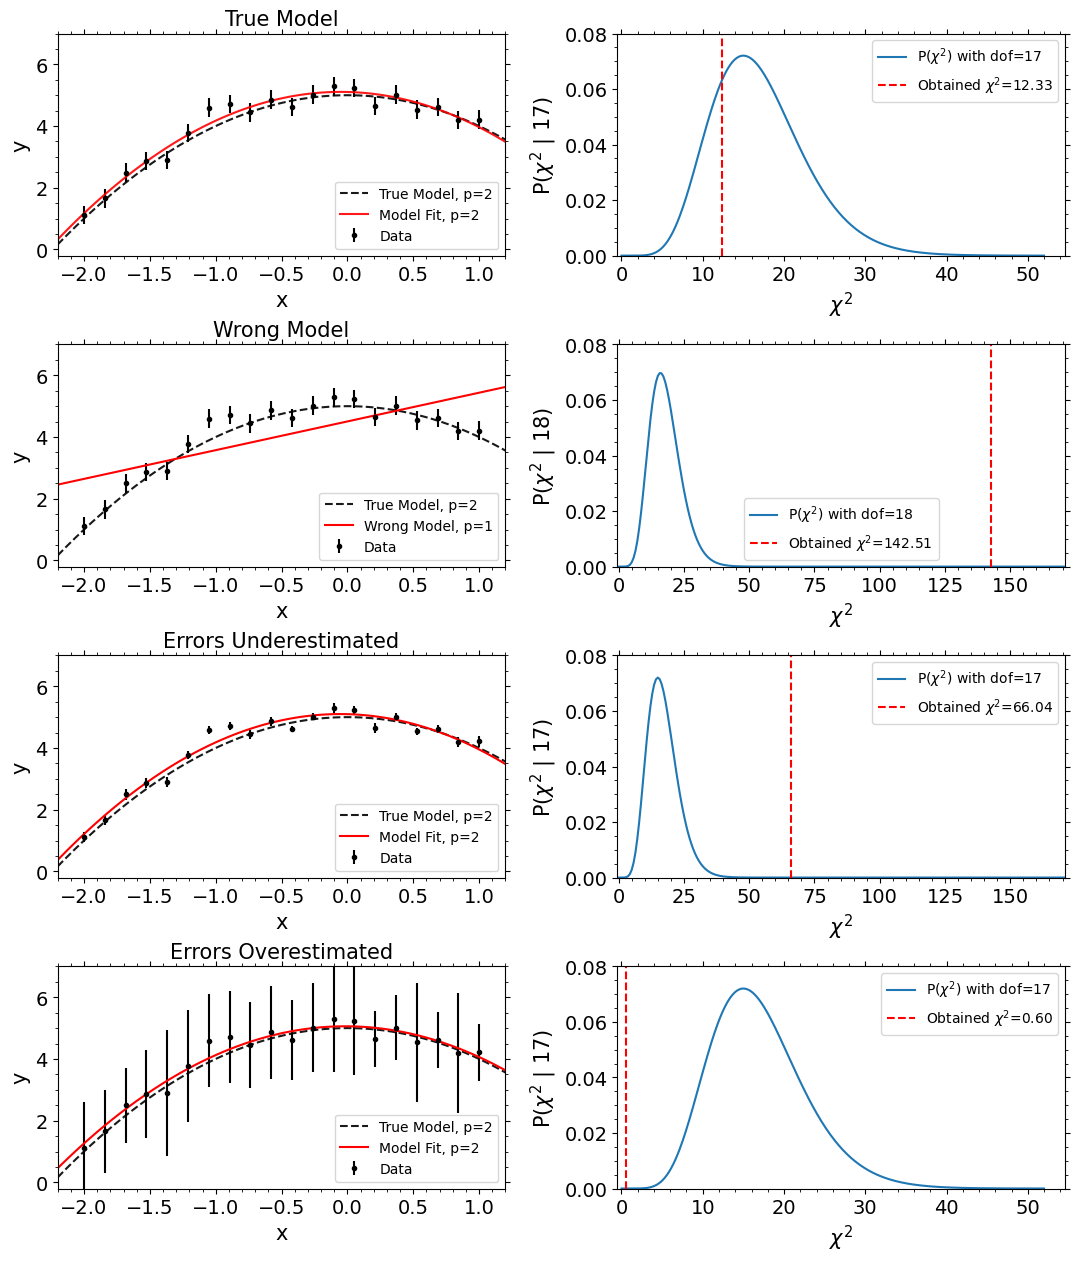

In [13]:
markersize= 3

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(13, 15))

# Plot for p2
axes[0, 0].errorbar(x, y, yerr=sig_y, fmt='o', color='k', label='Data', markersize=markersize)
axes[0, 0].plot(x_fine, y_true_fine, color='k', linestyle='--', alpha=0.9, linewidth=1.5, label=f'True Model, p={p2}')
axes[0, 0].plot(x_fine, y_p2_fit_fine, color='red', alpha=0.9, label=f'Model Fit, p={p2}')
axes[0, 0].set_title('True Model', fontsize=15)
axes[0, 0].set_xlabel('x', fontsize=15)
axes[0, 0].set_ylabel('y', fontsize=15)
axes[0, 0].legend(loc='lower right')

chi2_values = np.linspace(0, dof_p2 + 6.0*np.sqrt(2.0*dof_p2), 400)
axes[0, 1].plot(chi2_values, stats.chi2.pdf(chi2_values, dof_p2), label=f'P($\chi^2$) with dof={dof_p2}')
axes[0, 1].axvline(chi2_p2, color='r', linestyle='--', label=f'Obtained $\chi^2$={chi2_p2:.2f}')
axes[0, 1].set_xlabel('$\chi^2$', fontsize=15)
axes[0, 1].set_ylabel('P($\chi^2$ | {:d})'.format(dof_p2), fontsize=15)
axes[0, 1].legend()

# Plot for p1, wrong model
axes[1, 0].errorbar(x, y, yerr=sig_y, fmt='o', color='k', label='Data', markersize=markersize)
axes[1, 0].plot(x_fine, y_true_fine, color='k', linestyle='--', alpha=0.9, linewidth=1.5, label=f'True Model, p={p2}')
axes[1, 0].plot(x_fine, y_p1_fit_fine, color='red', label=f'Wrong Model, p={p1}')
axes[1, 0].set_title('Wrong Model', fontsize=15)
axes[1, 0].set_xlabel('x', fontsize=15)
axes[1, 0].set_ylabel('y', fontsize=15)
axes[1, 0].legend(loc='lower right')

chi2_values = np.linspace(0, chi2_p1*2, 400)
axes[1, 1].plot(chi2_values, stats.chi2.pdf(chi2_values, dof_p1), label=f'P($\chi^2$) with dof={dof_p1}')
axes[1, 1].axvline(chi2_p1, color='r', linestyle='--', label=f'Obtained $\chi^2$={chi2_p1:.2f}')
axes[1, 1].set_xlabel('$\chi^2$', fontsize=15)
axes[1, 1].set_ylabel('P($\chi^2$ | {:d})'.format(dof_p1), fontsize=15)
axes[1, 1].legend()
axes[1,1].set_xlim(0, 1.2*chi2_p1)


# Plot for p2 with underestimated errors
axes[2, 0].errorbar(x, y, yerr=sig_y_tosmal, fmt='o', color='k', label='Data', markersize=markersize)
axes[2, 0].plot(x_fine, y_true_fine, color='k', linestyle='--', alpha=0.9, linewidth=1.5, label=f'True Model, p={p2}')
axes[2, 0].plot(x_fine, y_p2_fit_toosmal_fine, color='red', label=f'Model Fit, p={p2}')
axes[2, 0].set_title('Errors Underestimated', fontsize=15)
axes[2, 0].set_xlabel('x', fontsize=15)
axes[2, 0].set_ylabel('y', fontsize=15)
axes[2, 0].legend(loc='lower right')

chi2_values = np.linspace(0, chi2_p1*2, 400)
axes[2, 1].plot(chi2_values, stats.chi2.pdf(chi2_values, dof_p2), label=f'P($\chi^2$) with dof={dof_p2}')
axes[2, 1].axvline(chi2_p2_toosmal, color='r', linestyle='--', label=f'Obtained $\chi^2$={chi2_p2_toosmal:.2f}')
axes[2, 1].set_xlabel('$\chi^2$', fontsize=15)
axes[2, 1].set_ylabel('P($\chi^2$ | {:d})'.format(dof_p2), fontsize=15)
axes[2, 1].legend()
axes[2,1].set_xlim(0, 1.2*chi2_p1)

# Plot for p2 with overestimated errors 
axes[3, 0].errorbar(x, y, yerr=sig_y_tobig, fmt='o', color='k', label='Data', markersize=markersize)
axes[3, 0].plot(x_fine, y_true_fine, color='k', linestyle='--', alpha=0.9, linewidth=1.5, label=f'True Model, p={p2}')
axes[3, 0].plot(x_fine, y_p2_fit_tobig_fine, color='red', label=f'Model Fit, p={p2}')
axes[3, 0].set_title('Errors Overestimated', fontsize=15)
axes[3, 0].set_xlabel('x', fontsize=15)
axes[3, 0].set_ylabel('y', fontsize=15)
axes[3, 0].legend(loc='lower right')

chi2_values = np.linspace(0, dof_p2 + 6.0*np.sqrt(2.0*dof_p2), 400)
axes[3, 1].plot(chi2_values, stats.chi2.pdf(chi2_values, dof_p2), label=f'P($\chi^2$) with dof={dof_p2}')
axes[3, 1].axvline(chi2_p2_toobig, color='r', linestyle='--', label=f'Obtained $\chi^2$={chi2_p2_toobig:.2f}')
axes[3, 1].set_xlabel('$\chi^2$', fontsize=15)
axes[3, 1].set_ylabel('P($\chi^2$ | {:d})'.format(dof_p2), fontsize=15)
axes[3, 1].legend()


ax_0 = axes[:, 0].flatten()
for a in ax_0:
    a.set_xlim(-2.2, 1.2)
    a.set_ylim(-0.2,7.0) 

ax_1 = axes[:, 1].flatten()
for a in ax_1:
    xlim = a.get_xlim()
    a.set_xlim(-0.5, xlim[1])
    a.set_ylim(0.0, 0.08) 

ax_flat = axes.flatten()
for a in ax_flat:
    a.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelsize=14)
    a.xaxis.set_minor_locator(AutoMinorLocator())
    a.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.25, hspace=0.4)